In [209]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import geopandas as gpd
from h3_utils import *
import h3
import h3pandas

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

In [210]:
data = gpd.read_parquet('../data/nga_ss_hex8.parquet')

In [211]:
data.head()

,hex8,ntl_sum,pop_sum,LST mean,geometry,land cover
0,8858890d61fffff,213.36,0.00,30.47,"POLYGON ((7.12134 6.83952, 7.12025 6.83537, 7....",57
1,8858d4782bfffff,236.30,70.81,32.84,"POLYGON ((8.08949 6.61433, 8.08836 6.61017, 8....",251
2,8858d6b8d5fffff,217.20,0.00,32.18,"POLYGON ((7.87739 6.37906, 7.87628 6.37492, 7....",252
3,88588baf67fffff,498.36,54.23,30.15,"POLYGON ((6.94948 6.27718, 6.94841 6.27307, 6....",251
4,8882da66a9fffff,494.37,193.44,27.24,"POLYGON ((6.98386 5.64060, 6.98279 5.63653, 6....",57


In [212]:
data.shape

(46306, 6)

In [213]:
major_cities_name = ['Aba', 'Enugu', 'Onitsha', 'Umuahia', 'Owerri', 'Nnewi', 'Awka','Abakaliki', 'Akwa']

In [214]:
lga = gpd.read_file('../data/Nigeria_-_Local_Government_Area_Boundaries.zip')

In [215]:
ss = ['Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo']
lga = lga[lga['statename'].isin(ss)]

In [220]:
def check_lga_city(lga_name):
    check_tf_list = [1 for x in major_cities_name if x in lga_name]
    
    if sum(check_tf_list)>0:
        return 1
    else:
        return 0

In [221]:
lga['lganame_check'] = lga['lganame'].apply(lambda x: check_lga_city(x))

In [222]:
major_city_lga = lga[lga['lganame_check']==1]

<Axes: >

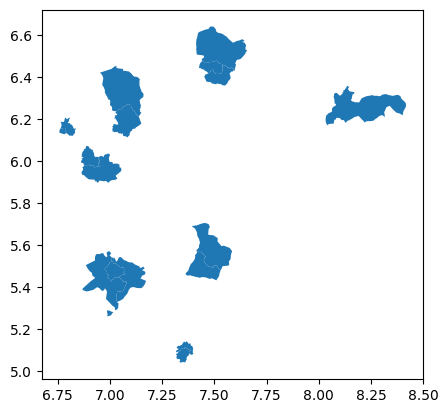

In [223]:
major_city_lga.plot()

In [224]:
# world_cities = gpd.read_file('../data/World_Urban_Areas-shp.zip')

In [225]:
# major_cities = world_cities[world_cities['Name'].isin(major_cities_name)]
# major_cities
# major_cities.at[181,'Name'] = 'Awka'
# major_cities

In [226]:
# major_cities.plot(column='Name')

In [227]:
water_points = gpd.read_file('../data/Nigeria_-_Water_Points.zip')
water_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [228]:
water_points_ss = gpd.sjoin(water_points, data)

In [229]:
major_city_water_points = water_points[water_points['lganame'].isin(major_city_lga['lganame'])]

In [230]:
water_points_ss.shape

(7919, 23)

In [231]:
# ss_hex8 = hex_generator(lga,8)['hex8'].to_list()
# ss_data = data[data['hex8'].isin(ss_hex8)]

In [232]:
print(f"Population in southeast states Nigeria: {data['pop_sum'].sum():E}")

Population in southeast states Nigeria: 2.483874E+07


In [233]:
major_city_lga_hex8 = hex_generator(major_city_lga,8)['hex8'].to_list()
major_city_data = data[data['hex8'].isin(major_city_lga_hex8)]

Starting...
Done
Generating hex at level 8
Done


In [234]:
major_city_data

,hex8,ntl_sum,pop_sum,LST mean,geometry,land cover
5,8882da4317fffff,333.40,11.61,20.90,"POLYGON ((7.56488 5.53068, 7.56379 5.52661, 7....",59
17,8858d699d5fffff,"1,080.67",505.85,31.40,"POLYGON ((7.45775 6.46802, 7.45665 6.46389, 7....",240
33,88588bacdbfffff,497.45,64.27,30.33,"POLYGON ((7.09055 6.27162, 7.08947 6.26750, 7....",50
45,8882da40d9fffff,"1,008.87","1,310.19",29.22,"POLYGON ((7.47363 5.53392, 7.47254 5.52986, 7....",240
56,88588bacabfffff,"4,981.91","1,320.64",30.67,"POLYGON ((7.07313 6.23713, 7.07205 6.23302, 7....",240
...,...,...,...,...,...,...
46226,88588b346dfffff,731.31,"1,413.85",28.55,"POLYGON ((7.07921 6.14829, 7.07813 6.14418, 7....",57
46242,8858d680cbfffff,275.47,0.00,29.95,"POLYGON ((7.63405 6.51193, 7.63295 6.50780, 7....",251
46262,88588b2ae5fffff,361.68,0.00,24.93,"POLYGON ((6.99818 5.93463, 6.99711 5.93055, 7....",57
46264,8882da4055fffff,897.68,"1,308.54",25.25,"POLYGON ((7.53080 5.52853, 7.52970 5.52446, 7....",240


In [235]:
print(f"Out of {water_points.shape[0]} water points in Nigeria, {water_points_ss.shape[0]} are in southeast states, taking up {water_points_ss.shape[0]/water_points.shape[0]*100:.0f}%")

Out of 28967 water points in Nigeria, 7919 are in southeast states, taking up 27%


In [236]:
major_city_lga['city'] = major_city_lga['lganame'].apply(lambda x: x.split(' ')[0])

In [237]:
major_city_lga['city'].unique()

array(['Enugu', 'Abakaliki', 'Onitsha', 'Umuahia', 'Owerri', 'Aba',
       'Nnewi', 'Awka'], dtype=object)

In [238]:
major_city_lga = major_city_lga.h3.polyfill(8)

In [239]:
major_city_lga.head()

,FID,globalid,uniq_id,timestamp,editor,lganame,lgacode,statename,statecode,source,amapcode,Shape__Are,Shape__Len,geometry,lganame_check,city,h3_polyfill
41,42,02ede445-db1b-47ea-a2be-e0e0793650e5,28801,2019-08-09,nuraddeen.isah,Enugu South,14005,Enugu,EN,WHO,NIE ENS UWN,0.01,0.46,"POLYGON ((7.57482 6.41163, 7.57503 6.40735, 7....",1,Enugu,"[8858d68adbfffff, 8858d6895bfffff, 8858d68a87f..."
96,97,d0137c1c-42fc-4cad-ae97-22869bcfa8b9,28738,2019-08-09,nuraddeen.isah,Abakaliki,11001,Ebonyi,EB,WHO,NIE EBS AKL,0.04,1.28,"POLYGON ((8.07510 6.19658, 8.07105 6.17672, 8....",1,Abakaliki,"[8858d0c305fffff, 8858d0dad5fffff, 8858d0dad7f..."
146,147,6d276304-2bb4-4168-8080-640b5c33287e,28826,2019-08-09,nuraddeen.isah,Enugu East,14003,Enugu,EN,WHO,NIE ENS NKW,0.03,0.85,"POLYGON ((7.53994 6.45454, 7.54040 6.45838, 7....",1,Enugu,"[8858d682dbfffff, 8858d69a1bfffff, 8858d69067f..."
291,292,3b26b6ef-acaa-41d6-9690-7b8e3f46dd1a,28842,2019-08-09,nuraddeen.isah,Enugu North,14004,Enugu,EN,WHO,NIE ENS ENU,0.00,0.34,"POLYGON ((7.48429 6.43064, 7.48331 6.42884, 7....",1,Enugu,"[8858d699e7fffff, 8858d69985fffff, 8858d68a0bf..."
378,379,28bad07d-261e-4f59-ada6-5836ddf47d88,28755,2019-08-09,nuraddeen.isah,Onitsha South,4018,Anambra,AN,WHO,NIE ANS FGG,0.00,0.12,"POLYGON ((6.79113 6.13434, 6.79239 6.13294, 6....",1,Onitsha,"[88588b0739fffff, 88588b072bfffff, 88588b073bf..."


In [240]:
major_city_lga_hex8_dict = major_city_lga.groupby('city').apply(lambda x: [h for hl in x['h3_polyfill'].to_list() for h in hl]).to_dict()

# major_city_lga_hex8_dict = dict(zip(major_cities.h3.polyfill(8)['Name'].to_list(),major_cities.h3.polyfill(8)['h3_polyfill'].to_list()))

In [241]:
# major_city_lga[['FID', 'globalid', 'uniq_id', 'timestamp', 'editor', 'lganame',
#        'lgacode', 'statename', 'statecode', 'source', 'amapcode', 'Shape__Are',
#        'Shape__Len', 'geometry', 'lganame_check', 'city',]].to_file('../data/ss_major_cities.gpkg', driver='GPKG')

In [242]:
major_city_lga_hex8_dict.keys()

dict_keys(['Aba', 'Abakaliki', 'Awka', 'Enugu', 'Nnewi', 'Onitsha', 'Owerri', 'Umuahia'])

In [243]:
for c in major_cities_name:
    try:
        print(f"{c}: {major_city_data[major_city_data['hex8'].isin(major_city_lga_hex8_dict[c])]['LST mean'].mean()}")
    
    except:
        print(c)

Aba: 29.658684920006642
Enugu: 30.931261071779232
Onitsha: 30.415182205398356
Umuahia: 26.677543512855
Owerri: 29.417658382808543
Nnewi: 27.22779976215469
Awka: 29.68424081750337
Abakaliki: 30.624708864023205
Akwa


### Owerri

In [244]:
city = 'Owerri'

In [268]:
city_hex8_data = major_city_data[major_city_data['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_hex8_data.shape[0]} hexes in {city}")
city_hex8_data.head()

There are 854 hexes in Owerri


,hex8,ntl_sum,pop_sum,LST mean,geometry,land cover
144,8882da2143fffff,588.21,80.02,29.12,"POLYGON ((6.93283 5.44567, 6.93177 5.44161, 6....",116
200,8882da22e9fffff,543.67,0.00,25.29,"POLYGON ((6.87545 5.38524, 6.87439 5.38119, 6....",116
252,8882da761bfffff,"1,009.73",952.69,27.23,"POLYGON ((7.08561 5.48832, 7.08454 5.48426, 7....",240
279,8882da2345fffff,584.29,631.37,32.02,"POLYGON ((6.96161 5.39669, 6.96054 5.39264, 6....",252
307,8882da39abfffff,"3,928.61","4,325.57",32.81,"POLYGON ((7.02324 5.48883, 7.02218 5.48477, 7....",240


In [360]:
# city_hex8_data.explore()

In [246]:
city_water_points = water_points_ss[water_points_ss['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_water_points.shape[0]} water points in {city}")
city_water_points.head()

There are 74 water points in Owerri


,FID,globalid,uniq_id,timestamp,editor,scdy_edtor,wardname,wardcode,lganame,lgacode,...,alt_name,name,source,geometry,index_right,hex8,ntl_sum,pop_sum,LST mean,land cover
4559,4560,508a8828-9f11-439f-a244-cb4448200083,97658,2018-07-06,adanna.alex,None,Emekuku 2,IMSRRT07,Owerri North,17025,...,None,Umuori Borehole,GRID,POINT (7.09445 5.49884),45436,8882da7617fffff,"1,123.83","3,563.45",31.02,240
4560,4561,1d782fdb-8a5f-4590-b97e-d7d5ca2be008,97659,2018-07-06,adanna.alex,None,Emekuku 2,IMSRRT07,Owerri North,17025,...,None,Borehole 3,GRID,POINT (7.10453 5.49657),14211,8882da7639fffff,972.75,"2,130.70",29.46,240
4562,4563,87e251f0-6488-4c60-9b68-839ea9a5d669,97661,2018-07-06,adanna.alex,None,Emekuku 2,IMSRRT07,Owerri North,17025,...,None,Borehole 1,GRID,POINT (7.10425 5.49349),39720,8882da7603fffff,746.50,"1,055.50",28.62,115
4563,4564,2733d77f-c970-45c2-81e4-d4f2c9e61d81,97662,2018-07-06,adanna.alex,None,Emekuku 2,IMSRRT07,Owerri North,17025,...,None,Borehole 2,GRID,POINT (7.10440 5.49354),39720,8882da7603fffff,746.50,"1,055.50",28.62,115
5150,5151,1805b5b7-35ad-4c5b-bba5-d22e15fefa10,98617,2018-08-29,adanna.alex,None,Nekede 1,IMSUMG07,Owerri West,17026,...,None,Borehole 3,GRID,POINT (7.03773 5.43955),45020,8882da3823fffff,"1,480.53",970.45,32.72,239


In [247]:
# major_cities.to_parquet('../data/urban_areas.parquet')

In [329]:
heat_island = city_hex8_data[(city_hex8_data['LST mean']>=30)|(city_hex8_data['land cover'].isin([239,240,241,242,243,249]))]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

In [330]:
heat_island.shape[0]

425

In [331]:
cool_island.shape[0]

429

In [332]:
heat_island['LST mean'].mean()

31.344059592218684

In [333]:
cool_island['LST mean'].mean()

27.509218956236733

In [334]:
heat_island['temp variance'] = heat_island['LST mean'] - cool_island['LST mean'].mean()

In [335]:
heat_island = heat_island[heat_island['temp variance']>0]

<Axes: >

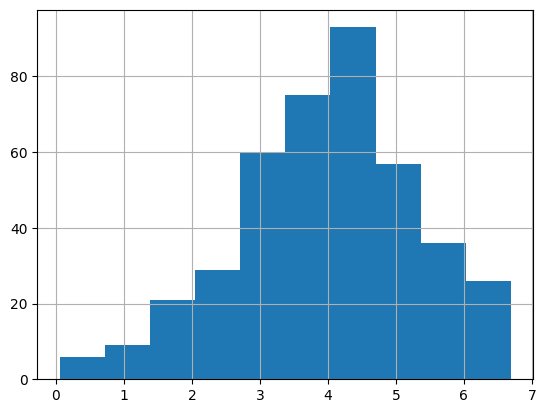

In [336]:
heat_island['temp variance'].hist()

In [337]:
from itertools import combinations

In [338]:
es = list(combinations(heat_island['hex8'].to_list(), r=2))
ws = [h3.h3_distance(h1, h2) for h1,h2 in es]

ew = dict(zip(es,ws))

In [339]:
ew_df = pd.DataFrame.from_dict(ew, orient='index')
ew_df = ew_df[ew_df[0]==1]

In [340]:
ew = dict(zip(ew_df.index.to_list(),ew_df[0].to_list()))

In [341]:
import networkx as nx
g = nx.Graph()
g.add_edges_from(ew)

In [342]:
largest_cc = max(nx.connected_components(g), key=len)
len(largest_cc)

379

In [343]:
heat_island.shape[0]

412

In [357]:
heat_island = heat_island[heat_island['hex8'].isin(largest_cc)]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

<Axes: >

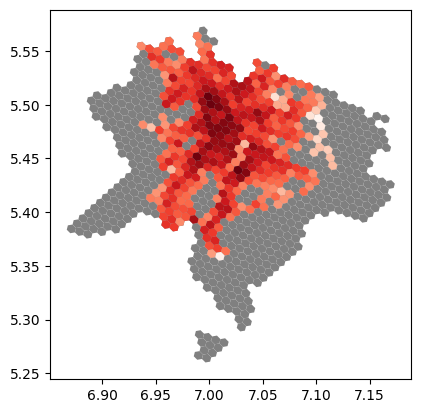

In [358]:
base = city_hex8_data.plot(fc='grey')
heat_island.plot(column='temp variance', ax=base, cmap='Reds')

What's the population of the city? What fraction of this population are affected by urban heat island?

In [348]:
city_pop = city_hex8_data['pop_sum'].sum()
heat_island_pop = heat_island['pop_sum'].sum()

In [349]:
print(f"There are {city_pop :.0f} population in city of {city}, {heat_island_pop:.0f} ({heat_island_pop/city_pop:.0%}) live in regions with urban heat island")

There are 654675 population in city of Owerri, 568033 (87%) live in regions with urban heat island


How many water points are there in the city? How many of them are in urban heat islands?

In [350]:
city_water_points_uhi = city_water_points[city_water_points['hex8'].isin(heat_island['hex8'])]

In [351]:
print(f"There are {city_water_points.shape[0]:.0f} water points in city of {city}, {city_water_points_uhi.shape[0]:.0f} \
({city_water_points_uhi.shape[0]/city_water_points.shape[0]:.0%}) of them are in urban heat islands")

There are 74 water points in city of Owerri, 47 (64%) of them are in urban heat islands


How many population are within 500m of water points?

How many population are within 1km of water points?

Among population affected by heat island, how many are within 500m of water points?

Among population affected by heat island, how many are within 500m of water points?

In [352]:
city_hex8_data.shape[0]

854

In [353]:
# neighbour hex as 1000m coverage
neighbor_hex = list(set([h for hl in city_water_points['hex8'].apply(lambda x: h3.k_ring(x, 1)).to_list() for h in hl]))
wp_covered_1000 = city_hex8_data[city_hex8_data['hex8'].isin(neighbor_hex)]
wp_covered_1000.shape

(274, 6)

In [354]:
# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|UHI
w500_uhi = heat_island[heat_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_uhi = heat_island_pop-w500_uhi

# within 1000m|UHI
w1000_uhi = heat_island[heat_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_uhi = heat_island_pop-w1000_uhi


In [363]:
cool_island_pop = cool_island['pop_sum'].sum()

# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|rural
w500_ci = cool_island[cool_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_ci = cool_island_pop-w500_ci

# within 1000m|rural
w1000_ci = cool_island[cool_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_ci = cool_island_pop-w1000_ci


In [355]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

79175 people (12% of the city population) are within 500 meters of water points in Owerri. 
314657 people (48% of the city population) are within 1000 meters of water points in Owerri. 


In [361]:
print(f"{w500_uhi:.0f} people ({w500_uhi/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{w1000_uhi:.0f} people ({w1000_uhi/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, while also suffer from UHI")

61169 people (9% of the city population) are within 500 meters of water points in Owerri, while also suffer from UHI
271483 people (41% of the city population) are within 1000 meters of water points in Owerri, while also suffer from UHI


In [356]:
print(f"{not_w500_uhi:.0f} people ({not_w500_uhi/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{not_w1000_uhi:.0f} people ({not_w1000_uhi/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, while also suffer from UHI")

506864 people (77% of the city population) are not within 500 meters of water points in Owerri, while also suffer from UHI
296550 people (45% of the city population) are not within 1000 meters of water points in Owerri, while also suffer from UHI


In [ ]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

79175 people (12% of the city population) are within 500 meters of water points in Owerri. 
314657 people (48% of the city population) are within 1000 meters of water points in Owerri. 


In [364]:
print(f"{w500_ci:.0f} people ({w500_ci/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, not in UHI")
print(f"{w1000_ci:.0f} people ({w1000_ci/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, not in UHI")

18006 people (3% of the city population) are within 500 meters of water points in Owerri, not in UHI
43174 people (7% of the city population) are within 1000 meters of water points in Owerri, not in UHI


In [365]:
print(f"{not_w500_ci:.0f} people ({not_w500_ci/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, not in UHI")
print(f"{not_w1000_ci:.0f} people ({not_w1000_ci/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, not in UHI")

68636 people (10% of the city population) are not within 500 meters of water points in Owerri, not in UHI
43468 people (7% of the city population) are not within 1000 meters of water points in Owerri, not in UHI


In [366]:
heat_island_pop

568032.9959479026

In [367]:
cool_island_pop

86641.96109635288

In [368]:
w500_uhi

61168.949574521655

In [369]:
not_w500_uhi

506864.04637338093

In [370]:
(not_w500_uhi+w500_uhi) == heat_island_pop

True

In [371]:
(not_w500_ci+w500_ci) == cool_island_pop

True

In [384]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 700.
height = 400.

values = [w500_uhi, not_w500_uhi, w500_ci, not_w500_ci]

# values must be sorted descending (and positive, obviously)
# values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

<Axes: >

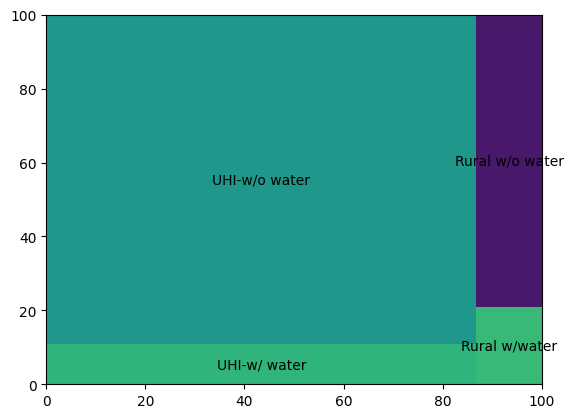

In [390]:
squarify.plot(sizes=values,  
              label=["UHI-w/ water", "UHI-w/o water", "Rural w/water", "Rural w/o water"],
              )

### Enugu

In [391]:
city = 'Enugu'

In [392]:
city_hex8_data = major_city_data[major_city_data['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_hex8_data.shape[0]} hexes in {city}")
city_hex8_data.head()

There are 809 hexes in Enugu


,hex8,ntl_sum,pop_sum,LST mean,geometry,land cover
17,8858d699d5fffff,"1,080.67",505.85,31.40,"POLYGON ((7.45775 6.46802, 7.45665 6.46389, 7....",240
60,8858d68b5dfffff,"2,365.65","1,866.27",30.97,"POLYGON ((7.47117 6.42331, 7.47008 6.41918, 7....",240
98,8858d682b5fffff,275.08,0.00,30.21,"POLYGON ((7.63182 6.51940, 7.63072 6.51526, 7....",251
122,8858d68113fffff,"1,991.16",788.53,31.64,"POLYGON ((7.57640 6.46997, 7.57529 6.46584, 7....",240
134,8858d68aa3fffff,"1,667.16",0.00,28.15,"POLYGON ((7.56211 6.40056, 7.56101 6.39643, 7....",252


In [ ]:
# city_hex8_data.explore()

In [393]:
city_water_points = water_points_ss[water_points_ss['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_water_points.shape[0]} water points in {city}")
city_water_points.head()

There are 73 water points in Enugu


,FID,globalid,uniq_id,timestamp,editor,scdy_edtor,wardname,wardcode,lganame,lgacode,...,alt_name,name,source,geometry,index_right,hex8,ntl_sum,pop_sum,LST mean,land cover
2470,2471,0cd22ad0-3997-499e-98b8-c9b7ac400bcb,94968,2019-01-25,adanna.alex,None,Ukanu / Awhum,ENSUDD17,Udi,14016,...,None,Awhum Borehole,GRID,POINT (7.41503 6.51731),28540,8858d69b13fffff,290.83,651.62,27.11,59
2472,2473,9c03fc2f-cde4-44e1-bb31-2178a5c5d8b4,94981,2019-01-25,adanna.alex,None,Ukanu / Awhum,ENSUDD17,Udi,14016,...,None,Umuka Water Point,GRID,POINT (7.41315 6.53058),12816,8858d69b1bfffff,316.13,"1,514.91",25.99,64
21128,21129,8562199c-a08f-453c-ad55-57233b82375f,93822,2018-10-30,racheal.olarewaju,None,Ngwo Uno,ENSUDD11,Udi,14016,...,None,Amaon Borehole,GRID,POINT (7.42731 6.44721),34888,8858d699e5fffff,511.94,536.83,29.53,240
21273,21274,93037416-950f-4da7-b867-59b65c8b68e0,93823,2018-10-30,racheal.olarewaju,None,Ngwo Uno,ENSUDD11,Udi,14016,...,None,J And M Public Water Point,GRID,POINT (7.42734 6.44676),34888,8858d699e5fffff,511.94,536.83,29.53,240
21285,21286,c50fd4ed-d6c7-43f3-ae32-9c8ef502eaee,93840,2018-10-30,racheal.olarewaju,None,Ngwo Uno,ENSUDD11,Udi,14016,...,None,Rock Base Water Point,GRID,POINT (7.42786 6.44996),34888,8858d699e5fffff,511.94,536.83,29.53,240


In [ ]:
# major_cities.to_parquet('../data/urban_areas.parquet')

In [394]:
heat_island = city_hex8_data[(city_hex8_data['LST mean']>=30)|(city_hex8_data['land cover'].isin([239,240,241,242,243,249]))]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

In [395]:
heat_island.shape[0]

605

In [396]:
cool_island.shape[0]

204

In [397]:
heat_island['LST mean'].mean()

31.666220250946804

In [398]:
cool_island['LST mean'].mean()

28.751602721796964

In [399]:
heat_island['temp variance'] = heat_island['LST mean'] - cool_island['LST mean'].mean()

In [400]:
heat_island = heat_island[heat_island['temp variance']>0]

<Axes: >

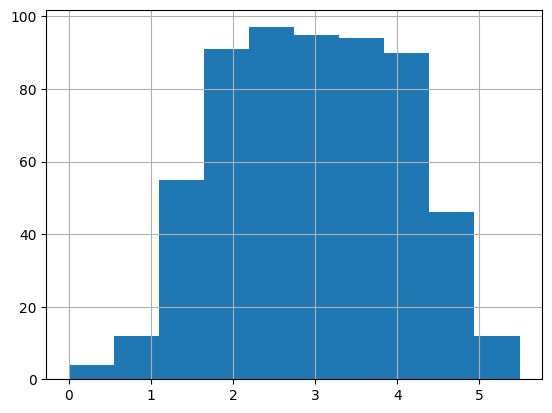

In [401]:
heat_island['temp variance'].hist()

In [402]:
from itertools import combinations

In [403]:
es = list(combinations(heat_island['hex8'].to_list(), r=2))
ws = [h3.h3_distance(h1, h2) for h1,h2 in es]

ew = dict(zip(es,ws))

In [404]:
ew_df = pd.DataFrame.from_dict(ew, orient='index')
ew_df = ew_df[ew_df[0]==1]

In [405]:
ew = dict(zip(ew_df.index.to_list(),ew_df[0].to_list()))

In [406]:
import networkx as nx
g = nx.Graph()
g.add_edges_from(ew)

In [407]:
largest_cc = max(nx.connected_components(g), key=len)
len(largest_cc)

572

In [408]:
heat_island.shape[0]

596

In [409]:
heat_island = heat_island[heat_island['hex8'].isin(largest_cc)]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

<Axes: >

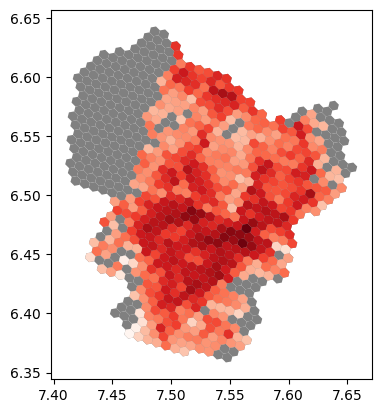

In [410]:
base = city_hex8_data.plot(fc='grey')
heat_island.plot(column='temp variance', ax=base, cmap='Reds')

What's the population of the city? What fraction of this population are affected by urban heat island?

In [411]:
city_pop = city_hex8_data['pop_sum'].sum()
heat_island_pop = heat_island['pop_sum'].sum()

In [412]:
print(f"There are {city_pop :.0f} population in city of {city}, {heat_island_pop:.0f} ({heat_island_pop/city_pop:.0%}) live in regions with urban heat island")

There are 916753 population in city of Enugu, 889211 (97%) live in regions with urban heat island


How many water points are there in the city? How many of them are in urban heat islands?

In [413]:
city_water_points_uhi = city_water_points[city_water_points['hex8'].isin(heat_island['hex8'])]

In [414]:
print(f"There are {city_water_points.shape[0]:.0f} water points in city of {city}, {city_water_points_uhi.shape[0]:.0f} \
({city_water_points_uhi.shape[0]/city_water_points.shape[0]:.0%}) of them are in urban heat islands")

There are 73 water points in city of Enugu, 59 (81%) of them are in urban heat islands


How many population are within 500m of water points?

How many population are within 1km of water points?

Among population affected by heat island, how many are within 500m of water points?

Among population affected by heat island, how many are within 500m of water points?

In [415]:
city_hex8_data.shape[0]

809

In [416]:
# neighbour hex as 1000m coverage
neighbor_hex = list(set([h for hl in city_water_points['hex8'].apply(lambda x: h3.k_ring(x, 1)).to_list() for h in hl]))
wp_covered_1000 = city_hex8_data[city_hex8_data['hex8'].isin(neighbor_hex)]
wp_covered_1000.shape

(175, 6)

In [417]:
# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|UHI
w500_uhi = heat_island[heat_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_uhi = heat_island_pop-w500_uhi

# within 1000m|UHI
w1000_uhi = heat_island[heat_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_uhi = heat_island_pop-w1000_uhi


In [418]:
cool_island_pop = cool_island['pop_sum'].sum()

# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|rural
w500_ci = cool_island[cool_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_ci = cool_island_pop-w500_ci

# within 1000m|rural
w1000_ci = cool_island[cool_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_ci = cool_island_pop-w1000_ci


In [419]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

151898 people (17% of the city population) are within 500 meters of water points in Enugu. 
490305 people (53% of the city population) are within 1000 meters of water points in Enugu. 


In [420]:
print(f"{w500_uhi:.0f} people ({w500_uhi/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{w1000_uhi:.0f} people ({w1000_uhi/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, while also suffer from UHI")

142269 people (16% of the city population) are within 500 meters of water points in Enugu, while also suffer from UHI
472488 people (52% of the city population) are within 1000 meters of water points in Enugu, while also suffer from UHI


In [421]:
print(f"{not_w500_uhi:.0f} people ({not_w500_uhi/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{not_w1000_uhi:.0f} people ({not_w1000_uhi/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, while also suffer from UHI")

746941 people (81% of the city population) are not within 500 meters of water points in Enugu, while also suffer from UHI
416723 people (45% of the city population) are not within 1000 meters of water points in Enugu, while also suffer from UHI


In [422]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

151898 people (17% of the city population) are within 500 meters of water points in Enugu. 
490305 people (53% of the city population) are within 1000 meters of water points in Enugu. 


In [423]:
print(f"{w500_ci:.0f} people ({w500_ci/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, not in UHI")
print(f"{w1000_ci:.0f} people ({w1000_ci/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, not in UHI")

9629 people (1% of the city population) are within 500 meters of water points in Enugu, not in UHI
17818 people (2% of the city population) are within 1000 meters of water points in Enugu, not in UHI


In [424]:
print(f"{not_w500_ci:.0f} people ({not_w500_ci/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, not in UHI")
print(f"{not_w1000_ci:.0f} people ({not_w1000_ci/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, not in UHI")

17914 people (2% of the city population) are not within 500 meters of water points in Enugu, not in UHI
9725 people (1% of the city population) are not within 1000 meters of water points in Enugu, not in UHI


In [425]:
heat_island_pop

889210.6549452436

In [426]:
cool_island_pop

27542.504071600015

In [427]:
w500_uhi

142269.22026128217

In [428]:
not_w500_uhi

746941.4346839614

In [429]:
(not_w500_uhi+w500_uhi) == heat_island_pop

True

In [430]:
(not_w500_ci+w500_ci) == cool_island_pop

True

In [431]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 700.
height = 400.

values = [w500_uhi, not_w500_uhi, w500_ci, not_w500_ci]

# values must be sorted descending (and positive, obviously)
# values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

<Axes: >

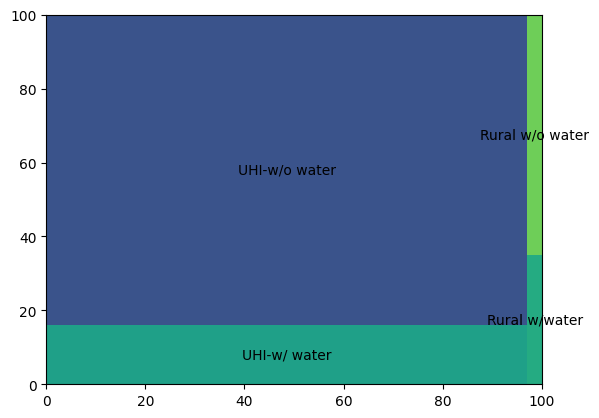

In [432]:
squarify.plot(sizes=values,  
              label=["UHI-w/ water", "UHI-w/o water", "Rural w/water", "Rural w/o water"],
              )

In [433]:
major_cities_name

['Aba',
 'Enugu',
 'Onitsha',
 'Umuahia',
 'Owerri',
 'Nnewi',
 'Awka',
 'Abakaliki',
 'Akwa']

### Umuahia

In [434]:
city = 'Umuahia'

In [435]:
city_hex8_data = major_city_data[major_city_data['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_hex8_data.shape[0]} hexes in {city}")
city_hex8_data.head()

There are 634 hexes in Umuahia


,hex8,ntl_sum,pop_sum,LST mean,geometry,land cover
5,8882da4317fffff,333.40,11.61,20.90,"POLYGON ((7.56488 5.53068, 7.56379 5.52661, 7....",59
45,8882da40d9fffff,"1,008.87","1,310.19",29.22,"POLYGON ((7.47363 5.53392, 7.47254 5.52986, 7....",240
194,8882da444bfffff,333.10,"2,057.20",27.76,"POLYGON ((7.39458 5.51993, 7.39350 5.51586, 7....",57
205,8882da40cbfffff,"2,296.96","2,523.31",29.99,"POLYGON ((7.48681 5.53626, 7.48572 5.53219, 7....",240
332,8882da5507fffff,491.36,264.68,25.00,"POLYGON ((7.50897 5.46267, 7.50788 5.45861, 7....",116


<Axes: >

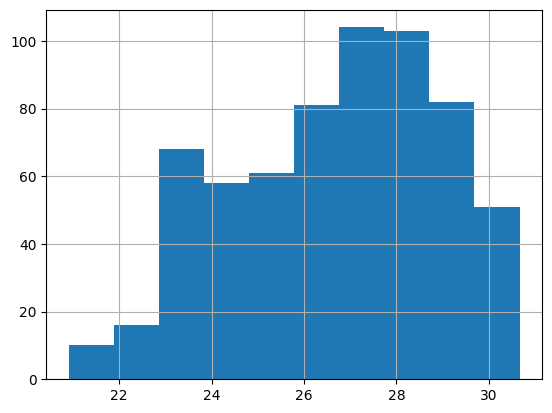

In [436]:
city_hex8_data['LST mean'].hist()

In [ ]:
# city_hex8_data.explore()

In [437]:
city_water_points = water_points_ss[water_points_ss['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_water_points.shape[0]} water points in {city}")
city_water_points.head()

There are 152 water points in Umuahia


,FID,globalid,uniq_id,timestamp,editor,scdy_edtor,wardname,wardcode,lganame,lgacode,...,alt_name,name,source,geometry,index_right,hex8,ntl_sum,pop_sum,LST mean,land cover
1764,1765,03fc5469-4a4e-4717-9fb5-3fa982220b30,80075,2018-06-06,racheal.olarewaju,None,Ahiaukwu A / Amangwu,ABSAPR01,Umuahia South,1017,...,None,Plot 19f Agbama Housing Estate Waterpoint,GRID,POINT (7.50258 5.49661),15078,8882da4289fffff,"1,787.99","5,728.89",29.95,240
13811,13812,8f51e7db-214a-4560-8f5e-499ad95e1bd4,79685,2018-06-06,racheal.olarewaju,None,Ahiaukwu A / Amangwu,ABSAPR01,Umuahia South,1017,...,None,Fline Borehole,GRID,POINT (7.50448 5.49802),15078,8882da4289fffff,"1,787.99","5,728.89",29.95,240
13817,13818,3ad8d21b-4eeb-426d-ad24-622cfd83f852,79691,2018-06-06,racheal.olarewaju,None,Ahiaukwu A / Amangwu,ABSAPR01,Umuahia South,1017,...,None,Area 4 Road 1 Borehole,GRID,POINT (7.50202 5.49930),15078,8882da4289fffff,"1,787.99","5,728.89",29.95,240
13854,13855,33810ccf-0380-4513-9df8-cae6fe25c424,79729,2018-06-06,racheal.olarewaju,None,Ahiaukwu A / Amangwu,ABSAPR01,Umuahia South,1017,...,None,Kenville Road Borehole,GRID,POINT (7.49805 5.49723),15078,8882da4289fffff,"1,787.99","5,728.89",29.95,240
23279,23280,066c593d-2c93-40e0-bdd3-e8ff65861e84,87259,2018-08-29,racheal.olarewaju,None,Ahiaukwu A / Amangwu,ABSAPR01,Umuahia South,1017,...,None,Vinifi Borehole,GRID,POINT (7.50183 5.49639),15078,8882da4289fffff,"1,787.99","5,728.89",29.95,240


In [438]:
# major_cities.to_parquet('../data/urban_areas.parquet')

In [439]:
heat_island = city_hex8_data[(city_hex8_data['LST mean']>=26)|(city_hex8_data['land cover'].isin([239,240,241,242,243,249]))]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

In [440]:
heat_island.shape[0]

412

In [441]:
cool_island.shape[0]

222

In [442]:
heat_island['LST mean'].mean()

28.046615844334287

In [443]:
cool_island['LST mean'].mean()

24.13674260938893

In [444]:
heat_island['temp variance'] = heat_island['LST mean'] - cool_island['LST mean'].mean()

In [445]:
heat_island = heat_island[heat_island['temp variance']>0]

<Axes: >

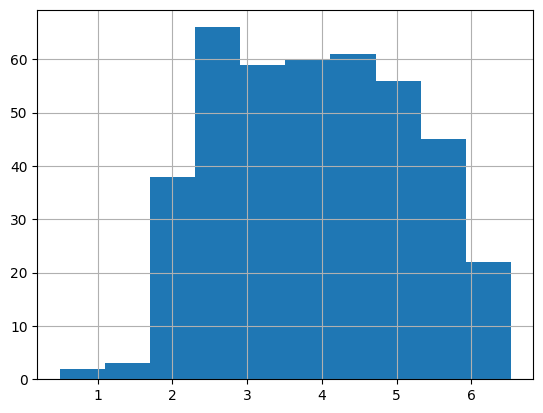

In [446]:
heat_island['temp variance'].hist()

In [447]:
from itertools import combinations

In [448]:
es = list(combinations(heat_island['hex8'].to_list(), r=2))
ws = [h3.h3_distance(h1, h2) for h1,h2 in es]

ew = dict(zip(es,ws))

In [449]:
ew_df = pd.DataFrame.from_dict(ew, orient='index')
ew_df = ew_df[ew_df[0]==1]

In [450]:
ew = dict(zip(ew_df.index.to_list(),ew_df[0].to_list()))

In [451]:
import networkx as nx
g = nx.Graph()
g.add_edges_from(ew)

In [452]:
largest_cc = max(nx.connected_components(g), key=len)
len(largest_cc)

389

In [453]:
heat_island.shape[0]

412

In [454]:
heat_island = heat_island[heat_island['hex8'].isin(largest_cc)]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

<Axes: >

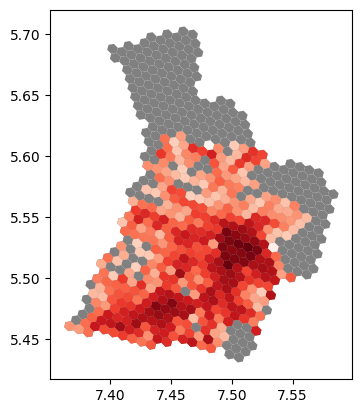

In [455]:
base = city_hex8_data.plot(fc='grey')
heat_island.plot(column='temp variance', ax=base, cmap='Reds')

What's the population of the city? What fraction of this population are affected by urban heat island?

In [456]:
city_pop = city_hex8_data['pop_sum'].sum()
heat_island_pop = heat_island['pop_sum'].sum()

In [457]:
print(f"There are {city_pop :.0f} population in city of {city}, {heat_island_pop:.0f} ({heat_island_pop/city_pop:.0%}) live in regions with urban heat island")

There are 476632 population in city of Umuahia, 452440 (95%) live in regions with urban heat island


How many water points are there in the city? How many of them are in urban heat islands?

In [458]:
city_water_points_uhi = city_water_points[city_water_points['hex8'].isin(heat_island['hex8'])]

In [459]:
print(f"There are {city_water_points.shape[0]:.0f} water points in city of {city}, {city_water_points_uhi.shape[0]:.0f} \
({city_water_points_uhi.shape[0]/city_water_points.shape[0]:.0%}) of them are in urban heat islands")

There are 152 water points in city of Umuahia, 146 (96%) of them are in urban heat islands


How many population are within 500m of water points?

How many population are within 1km of water points?

Among population affected by heat island, how many are within 500m of water points?

Among population affected by heat island, how many are within 500m of water points?

In [460]:
city_hex8_data.shape[0]

634

In [461]:
# neighbour hex as 1000m coverage
neighbor_hex = list(set([h for hl in city_water_points['hex8'].apply(lambda x: h3.k_ring(x, 1)).to_list() for h in hl]))
wp_covered_1000 = city_hex8_data[city_hex8_data['hex8'].isin(neighbor_hex)]
wp_covered_1000.shape

(297, 6)

In [462]:
# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|UHI
w500_uhi = heat_island[heat_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_uhi = heat_island_pop-w500_uhi

# within 1000m|UHI
w1000_uhi = heat_island[heat_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_uhi = heat_island_pop-w1000_uhi


In [463]:
cool_island_pop = cool_island['pop_sum'].sum()

# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|rural
w500_ci = cool_island[cool_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_ci = cool_island_pop-w500_ci

# within 1000m|rural
w1000_ci = cool_island[cool_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_ci = cool_island_pop-w1000_ci


In [464]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

167437 people (35% of the city population) are within 500 meters of water points in Umuahia. 
410881 people (86% of the city population) are within 1000 meters of water points in Umuahia. 


In [465]:
print(f"{w500_uhi:.0f} people ({w500_uhi/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{w1000_uhi:.0f} people ({w1000_uhi/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, while also suffer from UHI")

163477 people (34% of the city population) are within 500 meters of water points in Umuahia, while also suffer from UHI
394940 people (83% of the city population) are within 1000 meters of water points in Umuahia, while also suffer from UHI


In [466]:
print(f"{not_w500_uhi:.0f} people ({not_w500_uhi/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{not_w1000_uhi:.0f} people ({not_w1000_uhi/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, while also suffer from UHI")

288963 people (61% of the city population) are not within 500 meters of water points in Umuahia, while also suffer from UHI
57500 people (12% of the city population) are not within 1000 meters of water points in Umuahia, while also suffer from UHI


In [467]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

167437 people (35% of the city population) are within 500 meters of water points in Umuahia. 
410881 people (86% of the city population) are within 1000 meters of water points in Umuahia. 


In [468]:
print(f"{w500_ci:.0f} people ({w500_ci/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, not in UHI")
print(f"{w1000_ci:.0f} people ({w1000_ci/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, not in UHI")

3961 people (1% of the city population) are within 500 meters of water points in Umuahia, not in UHI
15941 people (3% of the city population) are within 1000 meters of water points in Umuahia, not in UHI


In [469]:
print(f"{not_w500_ci:.0f} people ({not_w500_ci/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, not in UHI")
print(f"{not_w1000_ci:.0f} people ({not_w1000_ci/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, not in UHI")

20232 people (4% of the city population) are not within 500 meters of water points in Umuahia, not in UHI
8252 people (2% of the city population) are not within 1000 meters of water points in Umuahia, not in UHI


In [470]:
heat_island_pop

452439.73571182723

In [471]:
cool_island_pop

24192.6959322549

In [472]:
w500_uhi

163476.56134029006

In [473]:
not_w500_uhi

288963.17437153717

In [474]:
(not_w500_uhi+w500_uhi) == heat_island_pop

True

In [475]:
(not_w500_ci+w500_ci) == cool_island_pop

True

In [478]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 400.
height = 400.

values = [w500_uhi, not_w500_uhi, w500_ci, not_w500_ci]

# values must be sorted descending (and positive, obviously)
# values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

<Axes: >

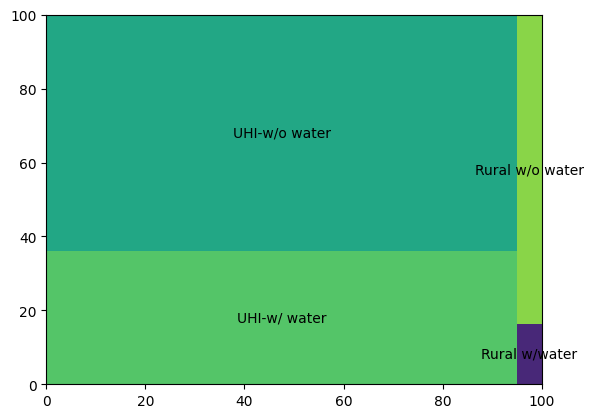

In [483]:
squarify.plot(sizes=values,  
              label=["UHI-w/ water", "UHI-w/o water", "Rural w/water", "Rural w/o water"],
              )

### Awka

In [485]:
city = 'Awka'

In [486]:
city_hex8_data = major_city_data[major_city_data['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_hex8_data.shape[0]} hexes in {city}")
city_hex8_data.head()

There are 838 hexes in Awka


,hex8,ntl_sum,pop_sum,LST mean,geometry,land cover
33,88588bacdbfffff,497.45,64.27,30.33,"POLYGON ((7.09055 6.27162, 7.08947 6.26750, 7....",50
56,88588bacabfffff,"4,981.91","1,320.64",30.67,"POLYGON ((7.07313 6.23713, 7.07205 6.23302, 7....",240
107,8858d6d96dfffff,"4,337.34","3,251.85",32.61,"POLYGON ((7.10180 6.23452, 7.10073 6.23041, 7....",240
202,88588badb5fffff,"1,738.40",0.00,29.58,"POLYGON ((7.04478 6.19285, 7.04371 6.18874, 7....",240
228,88588ba745fffff,217.40,36.36,25.74,"POLYGON ((7.01127 6.41780, 7.01020 6.41368, 7....",170


<Axes: >

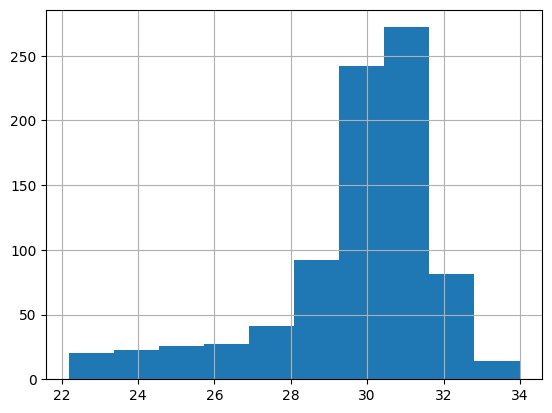

In [487]:
city_hex8_data['LST mean'].hist()

In [488]:
# city_hex8_data.explore()

In [489]:
city_water_points = water_points_ss[water_points_ss['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_water_points.shape[0]} water points in {city}")
city_water_points.head()

There are 141 water points in Awka


,FID,globalid,uniq_id,timestamp,editor,scdy_edtor,wardname,wardcode,lganame,lgacode,...,alt_name,name,source,geometry,index_right,hex8,ntl_sum,pop_sum,LST mean,land cover
5536,5537,e41480e6-2c54-4d2e-9ea3-bee2b88df560,99136,2018-09-28,racheal.olarewaju,None,Nise 2,ANSAWK18,Awka South,4006,...,None,Mr Mac Table Water Borehole,GRID,POINT (7.03937 6.15920),46006,88588b3761fffff,"1,344.15",103.73,29.39,252
5540,5541,1895113d-2bdf-4a90-b35a-dc559982cc80,99141,2018-09-28,racheal.olarewaju,None,Nise 2,ANSAWK18,Awka South,4006,...,None,Ifedioranm Age Grade Akiyi,GRID,POINT (7.02868 6.17137),37349,88588b3297fffff,"1,722.10",151.01,29.34,240
5541,5542,714a21d1-ea95-4181-b4c6-50267b9a0f51,99142,2018-09-28,racheal.olarewaju,None,Amawbia 2,ANSAWK02,Awka South,4006,...,None,Aghanya Street Water Point,GRID,POINT (7.05046 6.19530),18444,88588badb1fffff,"3,711.69",287.33,30.86,240
5594,5595,f3d1108b-ef7f-41c6-84a8-09f813bbc3c3,99220,2018-09-28,racheal.olarewaju,None,Amawbia 2,ANSAWK02,Awka South,4006,...,None,Oye Water Point,GRID,POINT (7.05191 6.19770),18444,88588badb1fffff,"3,711.69",287.33,30.86,240
5547,5548,78311662-06bf-4f6f-bbb1-3236c5d0f094,99152,2018-09-28,racheal.olarewaju,None,Nise 1,ANSAWK17,Awka South,4006,...,None,Agbadani Public Water Points,GRID,POINT (7.02185 6.14446),11809,88588b30ddfffff,"1,264.05","2,075.58",29.73,240


In [490]:
# major_cities.to_parquet('../data/urban_areas.parquet')

In [546]:
heat_island = city_hex8_data[(city_hex8_data['LST mean']>=30)|(city_hex8_data['land cover'].isin([239,240,241,242,243,249]))]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

In [547]:
heat_island.shape[0]

548

In [548]:
cool_island.shape[0]

290

In [549]:
heat_island['LST mean'].mean()

30.84062705022153

In [550]:
cool_island['LST mean'].mean()

27.499069591539406

In [551]:
heat_island['temp variance'] = heat_island['LST mean'] - cool_island['LST mean'].mean()

In [552]:
heat_island = heat_island[heat_island['temp variance']>0]

<Axes: >

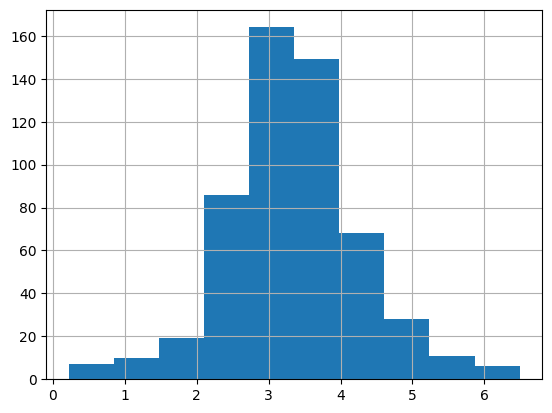

In [553]:
heat_island['temp variance'].hist()

In [554]:
from itertools import combinations

In [555]:
es = list(combinations(heat_island['hex8'].to_list(), r=2))
ws = [h3.h3_distance(h1, h2) for h1,h2 in es]

ew = dict(zip(es,ws))

In [556]:
ew_df = pd.DataFrame.from_dict(ew, orient='index')
ew_df = ew_df[ew_df[0]==1]

In [557]:
ew = dict(zip(ew_df.index.to_list(),ew_df[0].to_list()))

In [558]:
import networkx as nx
g = nx.Graph()
g.add_edges_from(ew)

In [559]:
largest_cc = max(nx.connected_components(g), key=len)
len(largest_cc)

449

In [560]:
heat_island.shape[0]

548

In [561]:
heat_island = heat_island[heat_island['hex8'].isin(largest_cc)]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

<Axes: >

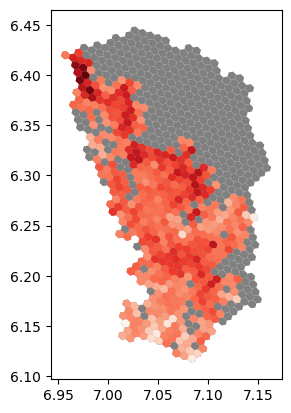

In [562]:
base = city_hex8_data.plot(fc='grey')
heat_island.plot(column='temp variance', ax=base, cmap='Reds')

What's the population of the city? What fraction of this population are affected by urban heat island?

In [563]:
city_pop = city_hex8_data['pop_sum'].sum()
heat_island_pop = heat_island['pop_sum'].sum()

In [564]:
print(f"There are {city_pop :.0f} population in city of {city}, {heat_island_pop:.0f} ({heat_island_pop/city_pop:.0%}) live in regions with urban heat island")

There are 440289 population in city of Awka, 364616 (83%) live in regions with urban heat island


How many water points are there in the city? How many of them are in urban heat islands?

In [565]:
city_water_points_uhi = city_water_points[city_water_points['hex8'].isin(heat_island['hex8'])]

In [566]:
print(f"There are {city_water_points.shape[0]:.0f} water points in city of {city}, {city_water_points_uhi.shape[0]:.0f} \
({city_water_points_uhi.shape[0]/city_water_points.shape[0]:.0%}) of them are in urban heat islands")

There are 141 water points in city of Awka, 116 (82%) of them are in urban heat islands


How many population are within 500m of water points?

How many population are within 1km of water points?

Among population affected by heat island, how many are within 500m of water points?

Among population affected by heat island, how many are within 500m of water points?

In [567]:
city_hex8_data.shape[0]

838

In [568]:
# neighbour hex as 1000m coverage
neighbor_hex = list(set([h for hl in city_water_points['hex8'].apply(lambda x: h3.k_ring(x, 1)).to_list() for h in hl]))
wp_covered_1000 = city_hex8_data[city_hex8_data['hex8'].isin(neighbor_hex)]
wp_covered_1000.shape

(278, 6)

In [569]:
# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|UHI
w500_uhi = heat_island[heat_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_uhi = heat_island_pop-w500_uhi

# within 1000m|UHI
w1000_uhi = heat_island[heat_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_uhi = heat_island_pop-w1000_uhi


In [570]:
cool_island_pop = cool_island['pop_sum'].sum()

# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|rural
w500_ci = cool_island[cool_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_ci = cool_island_pop-w500_ci

# within 1000m|rural
w1000_ci = cool_island[cool_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_ci = cool_island_pop-w1000_ci


In [571]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

144757 people (33% of the city population) are within 500 meters of water points in Awka. 
284484 people (65% of the city population) are within 1000 meters of water points in Awka. 


In [572]:
print(f"{w500_uhi:.0f} people ({w500_uhi/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{w1000_uhi:.0f} people ({w1000_uhi/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, while also suffer from UHI")

118077 people (27% of the city population) are within 500 meters of water points in Awka, while also suffer from UHI
240654 people (55% of the city population) are within 1000 meters of water points in Awka, while also suffer from UHI


In [573]:
print(f"{not_w500_uhi:.0f} people ({not_w500_uhi/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{not_w1000_uhi:.0f} people ({not_w1000_uhi/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, while also suffer from UHI")

246539 people (56% of the city population) are not within 500 meters of water points in Awka, while also suffer from UHI
123962 people (28% of the city population) are not within 1000 meters of water points in Awka, while also suffer from UHI


In [574]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

144757 people (33% of the city population) are within 500 meters of water points in Awka. 
284484 people (65% of the city population) are within 1000 meters of water points in Awka. 


In [575]:
print(f"{w500_ci:.0f} people ({w500_ci/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, not in UHI")
print(f"{w1000_ci:.0f} people ({w1000_ci/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, not in UHI")

26680 people (6% of the city population) are within 500 meters of water points in Awka, not in UHI
43829 people (10% of the city population) are within 1000 meters of water points in Awka, not in UHI


In [576]:
print(f"{not_w500_ci:.0f} people ({not_w500_ci/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, not in UHI")
print(f"{not_w1000_ci:.0f} people ({not_w1000_ci/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, not in UHI")

48993 people (11% of the city population) are not within 500 meters of water points in Awka, not in UHI
31843 people (7% of the city population) are not within 1000 meters of water points in Awka, not in UHI


In [577]:
heat_island_pop

364616.09696098574

In [578]:
cool_island_pop

75672.4647825764

In [579]:
w500_uhi

118077.30581449476

In [580]:
not_w500_uhi

246538.79114649098

In [581]:
(not_w500_uhi+w500_uhi) == heat_island_pop

True

In [582]:
(not_w500_ci+w500_ci) == cool_island_pop

True

In [583]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 400.
height = 400.

values = [w500_uhi, not_w500_uhi, w500_ci, not_w500_ci]

# values must be sorted descending (and positive, obviously)
# values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

<Axes: >

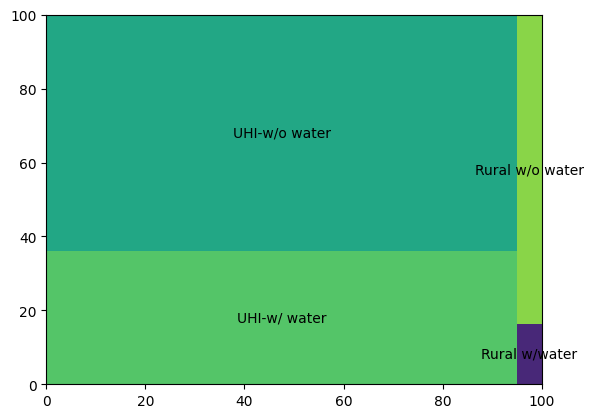

In [ ]:
squarify.plot(sizes=values,  
              label=["UHI-w/ water", "UHI-w/o water", "Rural w/water", "Rural w/o water"],
              )

### Nnewi

In [588]:
city = 'Nnewi'

In [589]:
city_hex8_data = major_city_data[major_city_data['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_hex8_data.shape[0]} hexes in {city}")
city_hex8_data.head()

There are 397 hexes in Nnewi


,hex8,ntl_sum,pop_sum,LST mean,geometry,land cover
201,88588b2b03fffff,412.53,"1,339.34",29.46,"POLYGON ((6.94011 5.92025, 6.93904 5.91616, 6....",239
425,88588b2ad5fffff,395.49,"1,556.68",26.96,"POLYGON ((7.02772 5.95166, 7.02665 5.94757, 7....",57
489,88588b21e5fffff,470.93,"3,439.86",28.11,"POLYGON ((7.03639 5.96881, 7.03532 5.96472, 7....",239
622,88588b2aa1fffff,327.66,642.22,24.65,"POLYGON ((7.01584 5.92225, 7.01477 5.91816, 7....",58
699,88588b3899fffff,665.30,"2,951.96",26.49,"POLYGON ((6.97343 6.01589, 6.97236 6.01180, 6....",239


<Axes: >

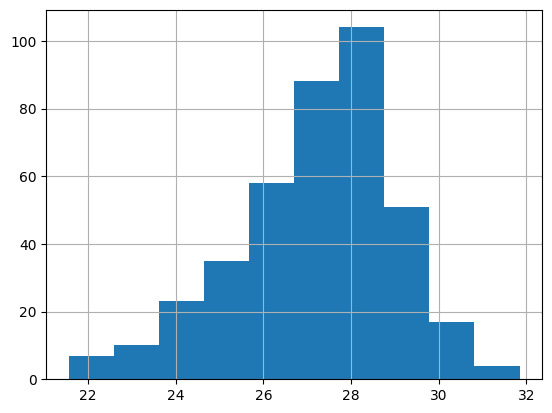

In [590]:
city_hex8_data['LST mean'].hist()

In [ ]:
# city_hex8_data.explore()

In [591]:
city_water_points = water_points_ss[water_points_ss['hex8'].isin(major_city_lga_hex8_dict[city])]
print(f"There are {city_water_points.shape[0]} water points in {city}")
city_water_points.head()

There are 171 water points in Nnewi


,FID,globalid,uniq_id,timestamp,editor,scdy_edtor,wardname,wardcode,lganame,lgacode,...,alt_name,name,source,geometry,index_right,hex8,ntl_sum,pop_sum,LST mean,land cover
2190,2191,e6f4aaa6-1e40-45b9-bb98-82c0e5bf1a12,91435,2018-09-28,racheal.olarewaju,None,Ukpor 2,ANSUKP14,Nnewi South,4015,...,None,Formula One Public Water Point,GRID,POINT (6.87821 5.96723),38865,88588b3937fffff,"1,556.76","2,535.99",27.60,240
19810,19811,9b6e238a-9f23-4617-a99c-b85702714f51,91324,2018-09-28,racheal.olarewaju,None,Ukpor 2,ANSUKP14,Nnewi South,4015,...,None,Obiefuna Public Water Point,GRID,POINT (6.87703 5.96653),38865,88588b3937fffff,"1,556.76","2,535.99",27.60,240
5552,5553,e8f636ac-a0fc-42aa-9494-1c9b85b68661,99163,2018-09-28,racheal.olarewaju,None,Uruagu 2,ANSNNE09,Nnewi North,4014,...,None,Union Secondary School Water Point,GRID,POINT (6.87813 6.03662),35544,88588b3b13fffff,"1,045.35","3,271.78",26.24,240
25237,25238,e030200e-dcbb-4ec1-85e2-9b173f36870f,102645,2018-09-28,racheal.olarewaju,None,Uruagu 2,ANSNNE09,Nnewi North,4014,...,None,Akaboukwu Ichi Water Point,GRID,POINT (6.88102 6.03575),35544,88588b3b13fffff,"1,045.35","3,271.78",26.24,240
5558,5559,3364fdbb-3665-496c-a7ee-f47cba23c31a,99170,2018-09-28,racheal.olarewaju,None,Uruagu 2,ANSNNE09,Nnewi North,4014,...,None,Public Water Point Uruagu Nnewi,GRID,POINT (6.87614 6.02759),789,88588b386dfffff,"1,139.38","3,599.81",27.32,240


In [592]:
# major_cities.to_parquet('../data/urban_areas.parquet')

In [593]:
heat_island = city_hex8_data[(city_hex8_data['LST mean']>=28)|(city_hex8_data['land cover'].isin([239,240,241,242,243,249]))]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

In [594]:
heat_island.shape[0]

297

In [595]:
cool_island.shape[0]

100

In [596]:
heat_island['LST mean'].mean()

27.856506530306998

In [597]:
cool_island['LST mean'].mean()

25.36054066074235

In [598]:
heat_island['temp variance'] = heat_island['LST mean'] - cool_island['LST mean'].mean()

In [599]:
heat_island = heat_island[heat_island['temp variance']>0]

<Axes: >

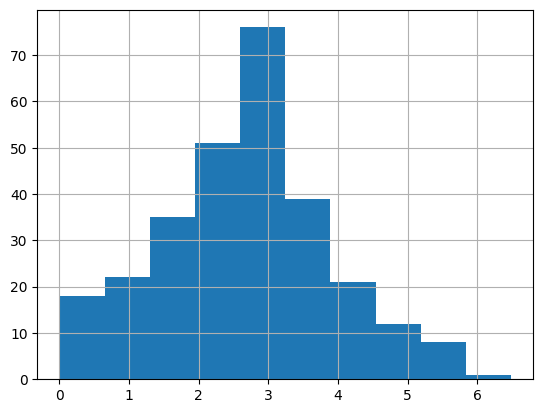

In [600]:
heat_island['temp variance'].hist()

In [601]:
from itertools import combinations

In [602]:
es = list(combinations(heat_island['hex8'].to_list(), r=2))
ws = [h3.h3_distance(h1, h2) for h1,h2 in es]

ew = dict(zip(es,ws))

In [603]:
ew_df = pd.DataFrame.from_dict(ew, orient='index')
ew_df = ew_df[ew_df[0]==1]

In [604]:
ew = dict(zip(ew_df.index.to_list(),ew_df[0].to_list()))

In [605]:
import networkx as nx
g = nx.Graph()
g.add_edges_from(ew)

In [606]:
largest_cc = max(nx.connected_components(g), key=len)
len(largest_cc)

276

In [607]:
heat_island.shape[0]

283

In [608]:
heat_island = heat_island[heat_island['hex8'].isin(largest_cc)]
cool_island = city_hex8_data[~city_hex8_data['hex8'].isin(heat_island['hex8'])]

<Axes: >

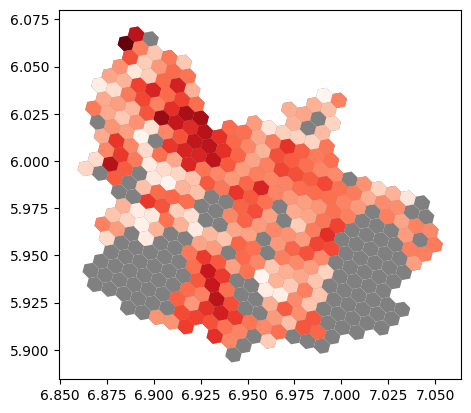

In [609]:
base = city_hex8_data.plot(fc='grey')
heat_island.plot(column='temp variance', ax=base, cmap='Reds')

What's the population of the city? What fraction of this population are affected by urban heat island?

In [610]:
city_pop = city_hex8_data['pop_sum'].sum()
heat_island_pop = heat_island['pop_sum'].sum()

In [611]:
print(f"There are {city_pop :.0f} population in city of {city}, {heat_island_pop:.0f} ({heat_island_pop/city_pop:.0%}) live in regions with urban heat island")

There are 719874 population in city of Nnewi, 621595 (86%) live in regions with urban heat island


How many water points are there in the city? How many of them are in urban heat islands?

In [612]:
city_water_points_uhi = city_water_points[city_water_points['hex8'].isin(heat_island['hex8'])]

In [613]:
print(f"There are {city_water_points.shape[0]:.0f} water points in city of {city}, {city_water_points_uhi.shape[0]:.0f} \
({city_water_points_uhi.shape[0]/city_water_points.shape[0]:.0%}) of them are in urban heat islands")

There are 171 water points in city of Nnewi, 151 (88%) of them are in urban heat islands


How many population are within 500m of water points?

How many population are within 1km of water points?

Among population affected by heat island, how many are within 500m of water points?

Among population affected by heat island, how many are within 500m of water points?

In [614]:
city_hex8_data.shape[0]

397

In [615]:
# neighbour hex as 1000m coverage
neighbor_hex = list(set([h for hl in city_water_points['hex8'].apply(lambda x: h3.k_ring(x, 1)).to_list() for h in hl]))
wp_covered_1000 = city_hex8_data[city_hex8_data['hex8'].isin(neighbor_hex)]
wp_covered_1000.shape

(320, 6)

In [616]:
# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|UHI
w500_uhi = heat_island[heat_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_uhi = heat_island_pop-w500_uhi

# within 1000m|UHI
w1000_uhi = heat_island[heat_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_uhi = heat_island_pop-w1000_uhi


In [617]:
cool_island_pop = cool_island['pop_sum'].sum()

# within 500m
p_w500 = city_hex8_data[city_hex8_data['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

# within 1000m
p_w1000 = city_hex8_data[city_hex8_data['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

# within 500m|rural
w500_ci = cool_island[cool_island['hex8'].isin(city_water_points['hex8'])]['pop_sum'].sum()

not_w500_ci = cool_island_pop-w500_ci

# within 1000m|rural
w1000_ci = cool_island[cool_island['hex8'].isin(wp_covered_1000['hex8'])]['pop_sum'].sum()

not_w1000_ci = cool_island_pop-w1000_ci


In [618]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

261747 people (36% of the city population) are within 500 meters of water points in Nnewi. 
636272 people (88% of the city population) are within 1000 meters of water points in Nnewi. 


In [619]:
print(f"{w500_uhi:.0f} people ({w500_uhi/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{w1000_uhi:.0f} people ({w1000_uhi/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, while also suffer from UHI")

242967 people (34% of the city population) are within 500 meters of water points in Nnewi, while also suffer from UHI
564488 people (78% of the city population) are within 1000 meters of water points in Nnewi, while also suffer from UHI


In [620]:
print(f"{not_w500_uhi:.0f} people ({not_w500_uhi/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, while also suffer from UHI")
print(f"{not_w1000_uhi:.0f} people ({not_w1000_uhi/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, while also suffer from UHI")

378628 people (53% of the city population) are not within 500 meters of water points in Nnewi, while also suffer from UHI
57107 people (8% of the city population) are not within 1000 meters of water points in Nnewi, while also suffer from UHI


In [621]:
print(f"{p_w500:.0f} people ({p_w500/city_pop:.0%} of the city population) are within 500 meters of water points in {city}. ")
print(f"{p_w1000:.0f} people ({p_w1000/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}. ")

261747 people (36% of the city population) are within 500 meters of water points in Nnewi. 
636272 people (88% of the city population) are within 1000 meters of water points in Nnewi. 


In [622]:
print(f"{w500_ci:.0f} people ({w500_ci/city_pop:.0%} of the city population) are within 500 meters of water points in {city}, not in UHI")
print(f"{w1000_ci:.0f} people ({w1000_ci/city_pop:.0%} of the city population) are within 1000 meters of water points in {city}, not in UHI")

18779 people (3% of the city population) are within 500 meters of water points in Nnewi, not in UHI
71784 people (10% of the city population) are within 1000 meters of water points in Nnewi, not in UHI


In [623]:
print(f"{not_w500_ci:.0f} people ({not_w500_ci/city_pop:.0%} of the city population) are not within 500 meters of water points in {city}, not in UHI")
print(f"{not_w1000_ci:.0f} people ({not_w1000_ci/city_pop:.0%} of the city population) are not within 1000 meters of water points in {city}, not in UHI")

79499 people (11% of the city population) are not within 500 meters of water points in Nnewi, not in UHI
26494 people (4% of the city population) are not within 1000 meters of water points in Nnewi, not in UHI


In [624]:
heat_island_pop

621595.0359924024

In [625]:
cool_island_pop

98278.85168472916

In [626]:
w500_uhi

242967.30227584252

In [627]:
not_w500_uhi

378627.73371655983

In [628]:
(not_w500_uhi+w500_uhi) == heat_island_pop

True

In [629]:
(not_w500_ci+w500_ci) == cool_island_pop

True

In [630]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 400.
height = 400.

values = [w500_uhi, not_w500_uhi, w500_ci, not_w500_ci]

# values must be sorted descending (and positive, obviously)
# values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

<Axes: >

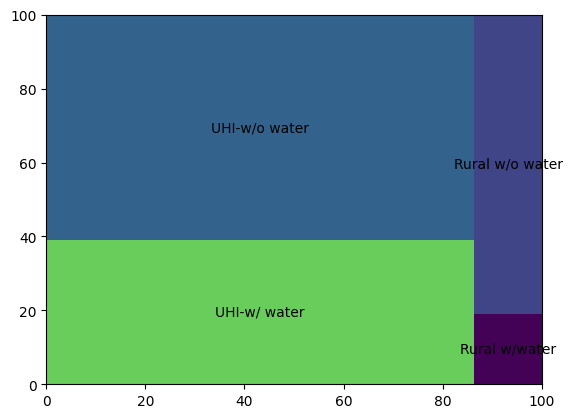

In [631]:
squarify.plot(sizes=values,  
              label=["UHI-w/ water", "UHI-w/o water", "Rural w/water", "Rural w/o water"],
              )